<a href="https://colab.research.google.com/github/Kwazi083/Xente-Fraud-Detection-Challenge/blob/master/Xente_Fraud_Detection_Challenge_Zindi.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [192]:
# Run this cell to mount your Google Drive.
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [0]:
#import libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier
from sklearn.utils import resample
from sklearn.dummy import DummyClassifier
from sklearn.metrics import accuracy_score, f1_score, confusion_matrix, recall_score

In [0]:
#read train and test data
train_df = pd.read_csv('/content/drive/My Drive/Colab Notebooks/Xente Fraud Detection/training.csv')
test_df = pd.read_csv('/content/drive/My Drive/Colab Notebooks/Xente Fraud Detection/test.csv')

In [269]:
train_df.head()

,TransactionId,BatchId,AccountId,SubscriptionId,CustomerId,CurrencyCode,CountryCode,ProviderId,ProductId,ProductCategory,ChannelId,Amount,Value,TransactionStartTime,PricingStrategy,FraudResult
0,TransactionId_76871,BatchId_36123,AccountId_3957,SubscriptionId_887,CustomerId_4406,UGX,256,ProviderId_6,ProductId_10,airtime,ChannelId_3,1000.0,1000,2018-11-15T02:18:49Z,2,0
1,TransactionId_73770,BatchId_15642,AccountId_4841,SubscriptionId_3829,CustomerId_4406,UGX,256,ProviderId_4,ProductId_6,financial_services,ChannelId_2,-20.0,20,2018-11-15T02:19:08Z,2,0
2,TransactionId_26203,BatchId_53941,AccountId_4229,SubscriptionId_222,CustomerId_4683,UGX,256,ProviderId_6,ProductId_1,airtime,ChannelId_3,500.0,500,2018-11-15T02:44:21Z,2,0
3,TransactionId_380,BatchId_102363,AccountId_648,SubscriptionId_2185,CustomerId_988,UGX,256,ProviderId_1,ProductId_21,utility_bill,ChannelId_3,20000.0,21800,2018-11-15T03:32:55Z,2,0
4,TransactionId_28195,BatchId_38780,AccountId_4841,SubscriptionId_3829,CustomerId_988,UGX,256,ProviderId_4,ProductId_6,financial_services,ChannelId_2,-644.0,644,2018-11-15T03:34:21Z,2,0


In [270]:
test_df.head()

,TransactionId,BatchId,AccountId,SubscriptionId,CustomerId,CurrencyCode,CountryCode,ProviderId,ProductId,ProductCategory,ChannelId,Amount,Value,TransactionStartTime,PricingStrategy
0,TransactionId_50600,BatchId_35028,AccountId_2441,SubscriptionId_4426,CustomerId_2857,UGX,256,ProviderId_5,ProductId_3,airtime,ChannelId_3,1000.0,1000,2019-02-13T10:01:40Z,4
1,TransactionId_95109,BatchId_45139,AccountId_3439,SubscriptionId_2643,CustomerId_3874,UGX,256,ProviderId_5,ProductId_15,financial_services,ChannelId_3,2000.0,2000,2019-02-13T10:02:12Z,2
2,TransactionId_47357,BatchId_74887,AccountId_4841,SubscriptionId_3829,CustomerId_2857,UGX,256,ProviderId_4,ProductId_6,financial_services,ChannelId_2,-50.0,50,2019-02-13T10:02:30Z,2
3,TransactionId_28185,BatchId_11025,AccountId_2685,SubscriptionId_4626,CustomerId_3105,UGX,256,ProviderId_5,ProductId_10,airtime,ChannelId_3,3000.0,3000,2019-02-13T10:02:38Z,4
4,TransactionId_22140,BatchId_29804,AccountId_4841,SubscriptionId_3829,CustomerId_3105,UGX,256,ProviderId_4,ProductId_6,financial_services,ChannelId_2,-60.0,60,2019-02-13T10:02:58Z,2


In [271]:
#Train shape
train_df.shape

(95662, 16)

In [272]:
#Test shape
test_df.shape

(45019, 15)

In [0]:
Trans_id = test_df['TransactionId']

In [274]:
Trans_id.shape

(45019,)

In [275]:
#Check unique values in our target variable
train_df['FraudResult'].unique()

array([0, 1])

In [276]:
#Check count of fraud results
train_df['FraudResult'].value_counts()

0    95469
1      193
Name: FraudResult, dtype: int64

In [277]:
#Check if I have any missing values in my train dataset
train_df.isnull().sum()

TransactionId           0
BatchId                 0
AccountId               0
SubscriptionId          0
CustomerId              0
CurrencyCode            0
CountryCode             0
ProviderId              0
ProductId               0
ProductCategory         0
ChannelId               0
Amount                  0
Value                   0
TransactionStartTime    0
PricingStrategy         0
FraudResult             0
dtype: int64

In [278]:
#Check if I have any missing values in my test dataset
test_df.isnull().sum()

TransactionId           0
BatchId                 0
AccountId               0
SubscriptionId          0
CustomerId              0
CurrencyCode            0
CountryCode             0
ProviderId              0
ProductId               0
ProductCategory         0
ChannelId               0
Amount                  0
Value                   0
TransactionStartTime    0
PricingStrategy         0
dtype: int64

In [0]:
#Concatenate train and test datasets
combined_df = pd.concat([train_df, test_df], axis = 0, sort = True)

In [280]:
#Combined dataset shape
combined_df.shape

(140681, 16)

In [281]:
#Check count of fraud results in combined dataset
combined_df['FraudResult'].value_counts()

0.0    95469
1.0      193
Name: FraudResult, dtype: int64

In [282]:
#The fraud results are heavily skewed towards no fraud result
print('No Frauds', round(combined_df['FraudResult'].value_counts()[0]/len(combined_df) * 100,2), '% of the combined dataset')
print('Frauds', round(combined_df['FraudResult'].value_counts()[1]/len(combined_df) * 100,2), '% of the combined dataset')

No Frauds 67.86 % of the combined dataset
Frauds 0.14 % of the combined dataset


[Text(0, 0, 'No Fraud'), Text(0, 0, 'Fraud')]

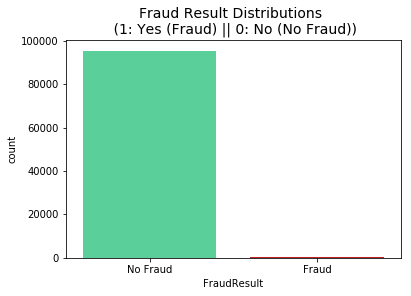

In [283]:
#Distribution of fraud result
colors = ["#46e39c", "#DF0101"]

result = sns.countplot('FraudResult', data=combined_df, palette=colors)
plt.title('Fraud Result Distributions \n (1: Yes (Fraud) || 0: No (No Fraud))', fontsize=14)
result.set_xticklabels(['No Fraud', 'Fraud'])

In [284]:
#Checking categorical values 'ProductCategory'
combined_df['ProductCategory'].unique()

array(['airtime', 'financial_services', 'utility_bill', 'data_bundles',
       'tv', 'transport', 'ticket', 'movies', 'other', 'retail'],
      dtype=object)

In [285]:
#Check count of categorical values in combined dataset
combined_df['ProductCategory'].value_counts()

financial_services    67105
airtime               65950
utility_bill           2660
data_bundles           2527
tv                     1738
movies                  253
ticket                  232
retail                  184
transport                30
other                     2
Name: ProductCategory, dtype: int64

In [286]:
combined_df['TransactionStartTime'].head()

0    2018-11-15T02:18:49Z
1    2018-11-15T02:19:08Z
2    2018-11-15T02:44:21Z
3    2018-11-15T03:32:55Z
4    2018-11-15T03:34:21Z
Name: TransactionStartTime, dtype: object

In [0]:
#Extract year from transaction start time
combined_df['TransactionStartTime'] = pd.to_datetime(combined_df['TransactionStartTime'])

In [0]:
combined_df['Year'] = combined_df['TransactionStartTime'].dt.year

In [289]:
#Checking categorical values 'Year'
combined_df['Year'].unique()

array([2018, 2019])

In [0]:
combined_df = combined_df.drop("TransactionStartTime", axis=1)

In [291]:
combined_df.columns

Index(['AccountId', 'Amount', 'BatchId', 'ChannelId', 'CountryCode',
       'CurrencyCode', 'CustomerId', 'FraudResult', 'PricingStrategy',
       'ProductCategory', 'ProductId', 'ProviderId', 'SubscriptionId',
       'TransactionId', 'Value', 'Year'],
      dtype='object')

In [292]:
#Check count of fraud results in combined dataset
combined_df['ChannelId'].value_counts()

ChannelId_3    95025
ChannelId_2    43339
ChannelId_5     1650
ChannelId_1      640
ChannelId_4       27
Name: ChannelId, dtype: int64

In [293]:
#Check count of fraud results in combined dataset
combined_df['ProviderId'].value_counts()

ProviderId_4    56445
ProviderId_6    50007
ProviderId_5    21519
ProviderId_1     8034
ProviderId_3     4652
ProviderId_2       24
Name: ProviderId, dtype: int64

In [0]:
#Categories so far - ProviderId, ChannelId, Year, ProductCategory
#Categorical variables which need to be encoded
categorical = ['ProductCategory', 'Year', 'ProviderId', 'ChannelId']

for x in categorical:
    combined_df = pd.concat([combined_df, 
                    pd.get_dummies(combined_df[x], prefix=x)], axis=1)
    del combined_df[x]

In [295]:
combined_df.head()

,AccountId,Amount,BatchId,CountryCode,CurrencyCode,CustomerId,FraudResult,PricingStrategy,ProductId,SubscriptionId,TransactionId,Value,ProductCategory_airtime,ProductCategory_data_bundles,ProductCategory_financial_services,ProductCategory_movies,ProductCategory_other,ProductCategory_retail,ProductCategory_ticket,ProductCategory_transport,ProductCategory_tv,ProductCategory_utility_bill,Year_2018,Year_2019,ProviderId_ProviderId_1,ProviderId_ProviderId_2,ProviderId_ProviderId_3,ProviderId_ProviderId_4,ProviderId_ProviderId_5,ProviderId_ProviderId_6,ChannelId_ChannelId_1,ChannelId_ChannelId_2,ChannelId_ChannelId_3,ChannelId_ChannelId_4,ChannelId_ChannelId_5
0,AccountId_3957,1000.0,BatchId_36123,256,UGX,CustomerId_4406,0.0,2,ProductId_10,SubscriptionId_887,TransactionId_76871,1000,1,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,1,0,0,1,0,0
1,AccountId_4841,-20.0,BatchId_15642,256,UGX,CustomerId_4406,0.0,2,ProductId_6,SubscriptionId_3829,TransactionId_73770,20,0,0,1,0,0,0,0,0,0,0,1,0,0,0,0,1,0,0,0,1,0,0,0
2,AccountId_4229,500.0,BatchId_53941,256,UGX,CustomerId_4683,0.0,2,ProductId_1,SubscriptionId_222,TransactionId_26203,500,1,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,1,0,0,1,0,0
3,AccountId_648,20000.0,BatchId_102363,256,UGX,CustomerId_988,0.0,2,ProductId_21,SubscriptionId_2185,TransactionId_380,21800,0,0,0,0,0,0,0,0,0,1,1,0,1,0,0,0,0,0,0,0,1,0,0
4,AccountId_4841,-644.0,BatchId_38780,256,UGX,CustomerId_988,0.0,2,ProductId_6,SubscriptionId_3829,TransactionId_28195,644,0,0,1,0,0,0,0,0,0,0,1,0,0,0,0,1,0,0,0,1,0,0,0


In [0]:
#Drop the variables I won't be using
combined_df.drop(['AccountId', 'BatchId', 'CurrencyCode', 'CustomerId', 'ProductId', 'SubscriptionId', 'TransactionId'], axis=1, inplace=True)

In [0]:
#Separate input features and target
#X = combined_df.drop('FraudResult', axis = 1)
#y = combined_df.FraudResult

In [0]:
#X shape
#X.shape

In [0]:
#y shape
#y.shape

In [0]:
train_df = combined_df[pd.notnull(combined_df['FraudResult'])]
test_df = combined_df[pd.isnull(combined_df['FraudResult'])].drop(['FraudResult'], axis=1)

In [301]:
train_df.shape

(95662, 28)

In [302]:
test_df.shape

(45019, 27)

In [0]:
#Setting up training and testing sets
#X_train,X_test,y_train,y_test = train_test_split(X_train_df.drop(['FraudResult'], axis=1),X_train_df['FraudResult'],test_size=0.2, random_state=42)

In [0]:
#Separate input features and target
X = train_df.drop(['FraudResult'], axis = 1)
y = train_df['FraudResult']

In [305]:
X.shape

(95662, 27)

In [306]:
y.shape

(95662,)

In [0]:
both_df = pd.concat([train_df,test_df],axis = 0, sort = False)

In [254]:
both_df.head()

,Amount,CountryCode,FraudResult,PricingStrategy,Value,ProductCategory_airtime,ProductCategory_data_bundles,ProductCategory_financial_services,ProductCategory_movies,ProductCategory_other,ProductCategory_retail,ProductCategory_ticket,ProductCategory_transport,ProductCategory_tv,ProductCategory_utility_bill,Year_2018,Year_2019,ProviderId_ProviderId_1,ProviderId_ProviderId_2,ProviderId_ProviderId_3,ProviderId_ProviderId_4,ProviderId_ProviderId_5,ProviderId_ProviderId_6,ChannelId_ChannelId_1,ChannelId_ChannelId_2,ChannelId_ChannelId_3,ChannelId_ChannelId_4,ChannelId_ChannelId_5
0,1000.0,256,0.0,2,1000,1,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,1,0,0,1,0,0
1,-20.0,256,0.0,2,20,0,0,1,0,0,0,0,0,0,0,1,0,0,0,0,1,0,0,0,1,0,0,0
2,500.0,256,0.0,2,500,1,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,1,0,0,1,0,0
3,20000.0,256,0.0,2,21800,0,0,0,0,0,0,0,0,0,1,1,0,1,0,0,0,0,0,0,0,1,0,0
4,-644.0,256,0.0,2,644,0,0,1,0,0,0,0,0,0,0,1,0,0,0,0,1,0,0,0,1,0,0,0


In [0]:
#Separate input features and target
X = train_df.drop(['FraudResult'], axis = 1)
y = train_df['FraudResult']

In [308]:
y.isnull().sum()

0

In [0]:
#Setting up training and testing sets
X_train,X_test,y_train,y_test = train_test_split(X,y,test_size=0.20, random_state=42)

In [311]:
#Print shape for each set
print('X_train: ', X_train.shape)
print('X_test: ', X_test.shape)
print('y_train: ', y_train.shape)
print('y_test: ', y_test.shape)

X_train:  (76529, 27)
X_test:  (19133, 27)
y_train:  (76529,)
y_test:  (19133,)


In [312]:
#Train the model
random_fc = RandomForestClassifier(n_estimators = 10)
random_fc.fit(X_train, y_train)

RandomForestClassifier(bootstrap=True, class_weight=None, criterion='gini',
                       max_depth=None, max_features='auto', max_leaf_nodes=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, n_estimators=10,
                       n_jobs=None, oob_score=False, random_state=None,
                       verbose=0, warm_start=False)

In [0]:
rfc_pred = random_fc.predict(test_df)

In [318]:
rfc_pred.shape

(45019,)

In [0]:
results_df = pd.DataFrame({'TransactionId':Trans_id,'FraudResult':rfc_pred})

In [320]:
results_df.head()

,TransactionId,FraudResult
0,TransactionId_50600,0.0
1,TransactionId_95109,0.0
2,TransactionId_47357,0.0
3,TransactionId_28185,0.0
4,TransactionId_22140,0.0


In [0]:
results_df.to_csv('/content/drive/My Drive/Colab Notebooks/Xente Fraud Detection/Kwazi_submition.csv', index = False)

In [325]:
results_df['FraudResult'].value_counts()

0.0    44956
1.0       63
Name: FraudResult, dtype: int64